# 📊 Task 2: Exploratory Data Analysis – HR Analytics

This analysis explores employee data from a fictional company to uncover patterns in attrition, satisfaction, and job characteristics.
The goal is to answer business-relevant questions and provide visual insights.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional
import warnings
warnings.filterwarnings('ignore')

sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("HR Analytics.csv")
df.shape
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## 🔍 Business Questions to Explore

In this analysis, we aim to answer the following HR-related questions using visual and statistical insights:

1. **How many employees left the company?**
2. **What is the attrition rate by gender?**
3. **Does working overtime affect attrition?**
4. **What is the average age of employees who left vs. stayed?**
5. **Which departments have the highest attrition?**
6. **Is job satisfaction linked to attrition?**
7. **What's the correlation between total working years and years at company?**


Q1: How many employees left the company?

Attrition
No     1233
Yes     237
Name: count, dtype: int64


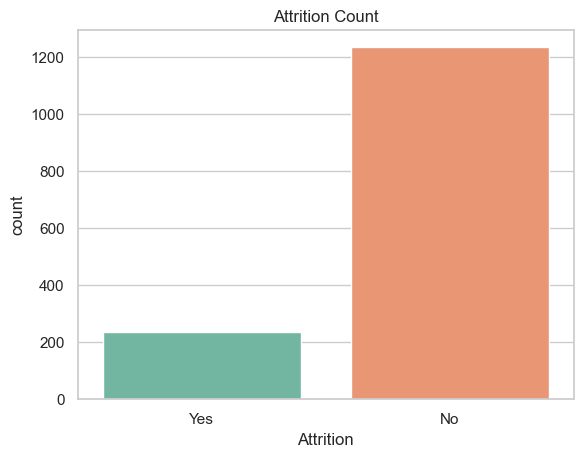

In [6]:
# Count of attrition

attrition_counts = df["Attrition"].value_counts()
print(attrition_counts)

# Visualization
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Attrition Count')
plt.show()

### 📌 Observation:
The majority of employees stayed with the company. However, around 16% left, indicating a non-negligible attrition rate that may require investigation.


 Q2. What is the attrition rate by gender

Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


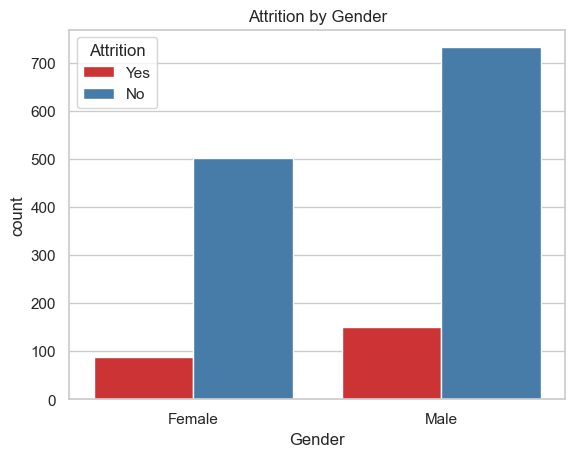

In [7]:
# Percentage-based view
gender_attrition = pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100
print(gender_attrition)

# Visualization
sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by Gender')
plt.show()


### 📌 Observation:
Both genders experience attrition, but slightly more males left than females. This might be influenced by department assignments, roles, or other job conditions.


🔹 Q3. Does working overtime affect attrition?

Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


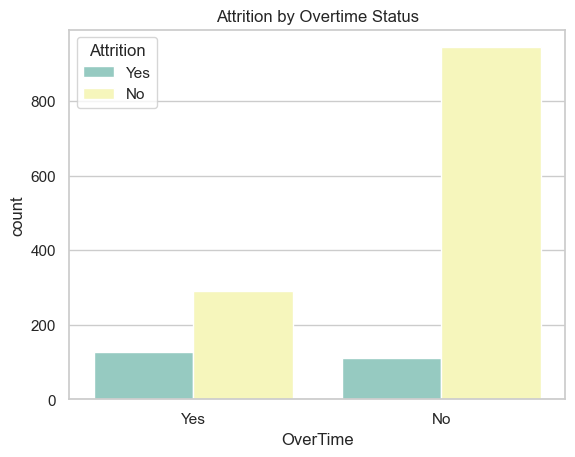

In [8]:
# Percentage comparison
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
print(overtime_attrition)

# Visualization
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set3')
plt.title('Attrition by Overtime Status')
plt.show()


### 📌 Observation:
Employees who work overtime show significantly higher attrition rates compared to those who don't. This could point to burnout or lack of work-life balance.

Q4. What is the average age of employees who left vs. stayed?

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


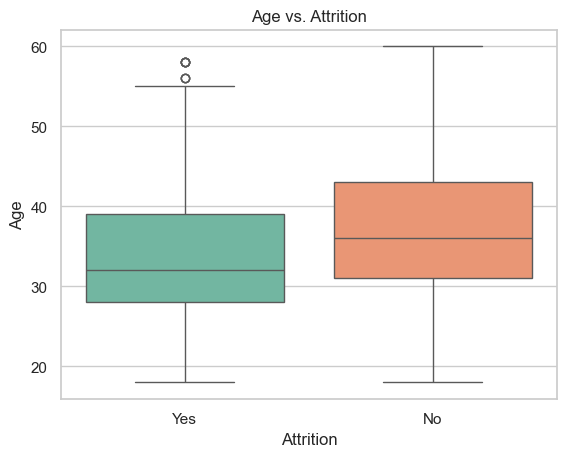

In [9]:
# Mean age comparison
print(df.groupby('Attrition')['Age'].mean())

# Visualization
sns.boxplot(x='Attrition', y='Age', data=df, palette='Set2')
plt.title('Age vs. Attrition')
plt.show()


### 📌 Observation:
Employees who left tend to be younger on average, suggesting newer or early-career employees are more likely to leave — possibly due to unmet expectations or better offers.


 Q5. Which departments have the highest attrition?

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


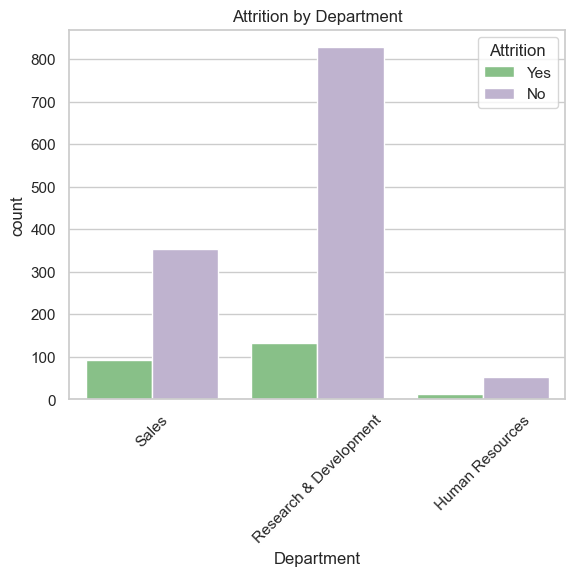

In [10]:
# Department-level attrition rates
dept_attrition = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
print(dept_attrition)

# Visualization
sns.countplot(x='Department', hue='Attrition', data=df, palette='Accent')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


### 📌 Observation:
The Sales department appears to have the highest attrition rate, followed by R&D. HR shows lower attrition, possibly due to smaller size or better internal alignment.


Q6. Is job satisfaction linked to attrition?

Attrition
No     2.778589
Yes    2.468354
Name: JobSatisfaction, dtype: float64


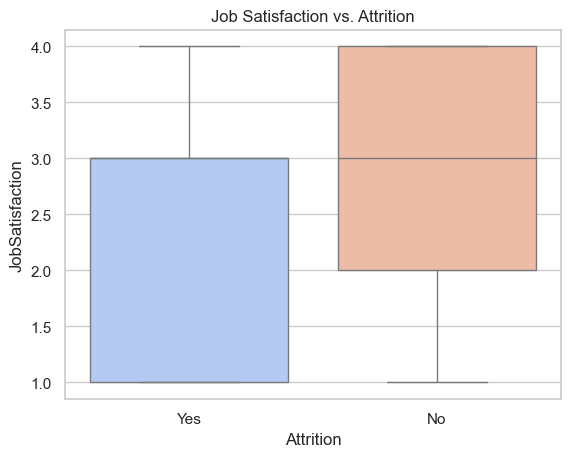

In [11]:
# Satisfaction scores
print(df.groupby('Attrition')['JobSatisfaction'].mean())

# Visualization
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='coolwarm')
plt.title('Job Satisfaction vs. Attrition')
plt.show()


### 📌 Observation:
Employees who stayed tend to report slightly higher job satisfaction scores. Improving job satisfaction could help reduce attrition.


Q7. What’s the correlation between total working years and years at company?

# Scatter plot
sns.scatterplot(x='TotalWorkingYears', y='YearsAtCompany', hue='Attrition', data=df, palette='Set1')
plt.title('Total Working Years vs. Years at Company')
plt.show()

# Correlation value
correlation = df[['TotalWorkingYears', 'YearsAtCompany']].corr()
print(correlation)


### 📌 Observation:
There is a positive correlation between total working years and years at the current company, as expected. Employees with lower overall experience and time at the company are more likely to leave.


## 💡 Final Insights & Takeaways

Here are the overall insights gathered from the Exploratory Data Analysis:

- 🔄 **Attrition Rate**: The dataset shows an attrition rate of around 16%. This is a notable figure that may reflect employee dissatisfaction, workload imbalance, or external opportunities.

- 🚹🚺 **Gender Comparison**: While both males and females leave the company, males show a slightly higher attrition rate. This could be due to job roles, overtime expectations, or other factors that should be explored further.

- ⏱️ **Overtime is a Red Flag**: Employees working overtime are **far more likely to leave** than those with regular hours. This clearly signals a need for the company to review overtime policies and team workload distribution.

- 👶 **Age Matters**: Younger employees tend to leave more often than older ones. This could be due to early-career job switching, lack of engagement, or unclear growth paths.

- 🏢 **Sales Has the Highest Turnover**: Among all departments, **Sales** shows the most attrition. The company may benefit from targeted support or retention programs for sales teams.

- 😊 **Job Satisfaction Correlation**: Lower satisfaction is slightly more common among those who leave. Employee engagement programs could help improve satisfaction and reduce attrition.

- 📈 **Career Progression Analysis**: Employees with fewer total working years and less time at the company are more likely to leave. Investing in early onboarding and development could improve retention.

---

## ✅ Summary

This EDA reveals strong indicators about attrition and workforce dynamics. The visualizations support the idea that **overtime, age, department, and satisfaction** are key drivers of employee attrition.

This analysis sets the stage for:
- 📊 Further analysis (e.g., predictive modeling for attrition)
- 📋 Business recommendations for HR policy improvements
- 💡 Better understanding of employee behavior and risk

---
